# Introduction 

This is the first deliverable from the GAP Analytics Bootcamp. In this notebook, an exploratory data analysis was done on a dataset about declarations of disaster. We assume that the data is exclusively from the US due to the fact that the institution that gather the data is an american one, but we need to confirm this asumption. The members of the group are:

- Cesar Rojas
- Nelson Acuña
- Daniel Troyo 

We will handle the following task in the notebook:

- Discover the size and structure of the dataset
- Handling empty values or notable outliers
- List the usable attributes in the dataset
- Visualize some relationships in the data

# Data Ingestion

In [94]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Constantes
DS_PATH = "data/eccc91e3-d623-4dc3-8413-1c6164424740_DisasterDeclarations.csv"

# Setea el maximo de filas a desplegar en 8
pd.options.display.max_rows = 15
pd.options.display.max_columns = 24


# Lee el dataset
df = pd.read_csv(DS_PATH, parse_dates = True)
df.head()

,disaster_number,ih_program_declared,ia_program_declared,pa_program_declared,hm_program_declared,state,declaration_date,disaster_type,incident_type,title,incident_begin_date,incident_end_date,disaster_close_out_date,declared_county_area,serialid
0,1,No,Yes,Yes,Yes,GA,1953-05-02T00:00:00,DR,Tornado,TORNADO,1953-05-02T00:00:00,1953-05-02T00:00:00,1954-06-01T00:00:00,NaN,1
1,2,No,Yes,Yes,Yes,TX,1953-05-15T00:00:00,DR,Tornado,TORNADO & HEAVY RAINFALL,1953-05-15T00:00:00,1953-05-15T00:00:00,1958-01-01T00:00:00,NaN,2
2,3,No,Yes,Yes,Yes,LA,1953-05-29T00:00:00,DR,Flood,FLOOD,1953-05-29T00:00:00,1953-05-29T00:00:00,1960-02-01T00:00:00,NaN,3
3,4,No,Yes,Yes,Yes,MI,1953-06-02T00:00:00,DR,Tornado,TORNADO,1953-06-02T00:00:00,1953-06-02T00:00:00,1956-02-01T00:00:00,NaN,4
4,5,No,Yes,Yes,Yes,MT,1953-06-06T00:00:00,DR,Flood,FLOODS,1953-06-06T00:00:00,1953-06-06T00:00:00,1955-12-01T00:00:00,NaN,5


# Some preliminary preprocessing


We'll delete some columns that we noticed are not useful to the general analysis. And some preprocessing, as well.

# Exploratory Data Analysis

Solo por probar hist() hice un histograma del número de desastre. Sin embargo el resultado no fue el esperado (distribución uniforme)...

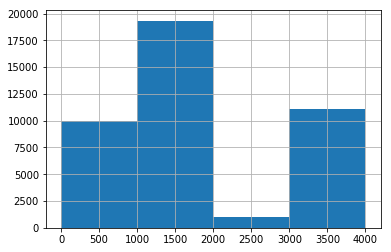

In [95]:
df['disaster_number'].hist(bins=[0,1000,2000,3000,4000])

Los números de desastre pueden estar repetidos; a primera vista lo que cambia entre el filas con el mismo número de desastre es el declared_county_area, pero hay que confirmarlo...

In [96]:
df[df['disaster_number'] == 263]

,disaster_number,ih_program_declared,ia_program_declared,pa_program_declared,hm_program_declared,state,declaration_date,disaster_type,incident_type,title,incident_begin_date,incident_end_date,disaster_close_out_date,declared_county_area,serialid
22168,263,No,Yes,Yes,Yes,TN,1969-07-11T00:00:00,DR,Flood,SEVERE STORMS & FLOODING,1969-07-11T00:00:00,1969-07-11T00:00:00,1972-06-22T00:00:00,Clay (County),1501
22169,263,No,Yes,Yes,Yes,TN,1969-07-11T00:00:00,DR,Flood,SEVERE STORMS & FLOODING,1969-07-11T00:00:00,1969-07-11T00:00:00,1972-06-22T00:00:00,Cumberland (County),1502
22170,263,No,Yes,Yes,Yes,TN,1969-07-11T00:00:00,DR,Flood,SEVERE STORMS & FLOODING,1969-07-11T00:00:00,1969-07-11T00:00:00,1972-06-22T00:00:00,Jackson (County),1503
22171,263,No,Yes,Yes,Yes,TN,1969-07-11T00:00:00,DR,Flood,SEVERE STORMS & FLOODING,1969-07-11T00:00:00,1969-07-11T00:00:00,1972-06-22T00:00:00,Macon (County),1504
22172,263,No,Yes,Yes,Yes,TN,1969-07-11T00:00:00,DR,Flood,SEVERE STORMS & FLOODING,1969-07-11T00:00:00,1969-07-11T00:00:00,1972-06-22T00:00:00,Overton (County),1505
22173,263,No,Yes,Yes,Yes,TN,1969-07-11T00:00:00,DR,Flood,SEVERE STORMS & FLOODING,1969-07-11T00:00:00,1969-07-11T00:00:00,1972-06-22T00:00:00,Sumner (County),1506


Se hace una agregación para determinar por cada disaster_number si los valores en cada columna son el mismo...

In [97]:
def are_all_equal(series):
    if (pd.isna(series.values[0])): # == doesnt work as expected for NaN
        return all(pd.isna(val) for val in series.values)
    else:
        return all(val == series.values[0] for val in series.values)

dfAreSameByDisaster = df.groupby('disaster_number').aggregate(are_all_equal)
dfAreSameByDisaster

,ih_program_declared,ia_program_declared,pa_program_declared,hm_program_declared,state,declaration_date,disaster_type,incident_type,title,incident_begin_date,incident_end_date,disaster_close_out_date,declared_county_area,serialid
disaster_number,,,,,,,,,,,,,,
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True,True,True,True,True,True,True,True
6,True,True,True,True,True,True,True,True,True,True,True,True,True,True
7,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4151,True,True,True,True,True,True,True,True,True,True,True,True,True,True


Y luego se hace otra agregación para verificar si para todos los disaster_number los valores en cada columna son el mismo. Al parecer las unicas columnas que cambian para un mismo disaster_number son state, declared_county_area y serialid.

In [98]:
def are_all_true(series):
    return all(val == True for val in series.values)

dsAreAlltrue = dfAreSameByDisaster.aggregate(are_all_true).to_frame().T
dsAreAlltrue

,ih_program_declared,ia_program_declared,pa_program_declared,hm_program_declared,state,declaration_date,disaster_type,incident_type,title,incident_begin_date,incident_end_date,disaster_close_out_date,declared_county_area,serialid
0,True,True,True,True,False,True,True,True,True,True,True,True,False,False


In [99]:
df.describe(include='all')

,disaster_number,ih_program_declared,ia_program_declared,pa_program_declared,hm_program_declared,state,declaration_date,disaster_type,incident_type,title,incident_begin_date,incident_end_date,disaster_close_out_date,declared_county_area,serialid
count,43367.000000,43367,43367,43367,43367,43367,43367,43367,43367,43367,43367,43012,29891,43170,43367.000000
unique,NaN,2,2,2,2,59,2366,4,21,1456,2202,2246,1199,2123,NaN
top,NaN,No,No,Yes,Yes,TX,2005-09-10T00:00:00,DR,Severe Storm(s),SEVERE STORMS & FLOODING,2005-08-29T00:00:00,2005-10-01T00:00:00,1994-06-30T00:00:00,Washington (County),NaN
freq,NaN,35896,23243,41972,32337,3558,777,31287,14544,3387,2764,2926,408,384,NaN
mean,1862.533217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21684.000000
std,1092.560275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12519.118899
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,1046.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10842.500000
50%,1593.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21684.000000
75%,3107.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32525.500000


Let's explore the categorical columns, or at least those which are not in the continous domain (num stats = NAN)

In [100]:
df.describe(include = ['object', 'bool'] )

,ih_program_declared,ia_program_declared,pa_program_declared,hm_program_declared,state,declaration_date,disaster_type,incident_type,title,incident_begin_date,incident_end_date,disaster_close_out_date,declared_county_area
count,43367,43367,43367,43367,43367,43367,43367,43367,43367,43367,43012,29891,43170
unique,2,2,2,2,59,2366,4,21,1456,2202,2246,1199,2123
top,No,No,Yes,Yes,TX,2005-09-10T00:00:00,DR,Severe Storm(s),SEVERE STORMS & FLOODING,2005-08-29T00:00:00,2005-10-01T00:00:00,1994-06-30T00:00:00,Washington (County)
freq,35896,23243,41972,32337,3558,777,31287,14544,3387,2764,2926,408,384


In [101]:
df['disaster_type'].value_counts()

DR    31287
EM    11045
FM      645
FS      390
Name: disaster_type, dtype: int64

In [102]:
df['disaster_type'].value_counts(normalize = 'True')

DR    0.721447
EM    0.254687
FM    0.014873
FS    0.008993
Name: disaster_type, dtype: float64

We need to find out what those acronyms mean. 

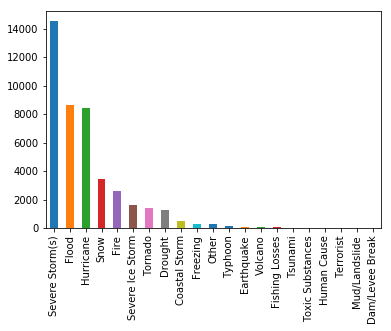

In [103]:
 df['incident_type'].value_counts().plot(kind='bar')

In [104]:
pd.crosstab(df['disaster_type'], df['incident_type'])

incident_type,Coastal Storm,Dam/Levee Break,Drought,Earthquake,Fire,Fishing Losses,Flood,Freezing,Human Cause,Hurricane,Mud/Landslide,Other,Severe Ice Storm,Severe Storm(s),Snow,Terrorist,Tornado,Toxic Substances,Tsunami,Typhoon,Volcano
disaster_type,,,,,,,,,,,,,,,,,,,,,
DR,170,3,87,103,914,34,8334,301,2,3821,4,10,1013,13701,1302,1,1310,3,10,115,49
EM,291,0,1205,0,664,8,286,0,4,4622,0,288,624,843,2135,4,66,5,0,0,0
FM,0,0,0,0,645,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
FS,0,0,0,0,390,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


So the the F in the acronym stands for 'Fire'. Maybe Fire Management and Fire Service.

In [105]:
boolean_values = {"Yes": True, "No": False}
boolean_columns = ['ih_program_declared', 'ia_program_declared', 'pa_program_declared', 'hm_program_declared']

for column in boolean_columns:
    df = df.replace({column: boolean_values})

In [106]:
df.head()

,disaster_number,ih_program_declared,ia_program_declared,pa_program_declared,hm_program_declared,state,declaration_date,disaster_type,incident_type,title,incident_begin_date,incident_end_date,disaster_close_out_date,declared_county_area,serialid
0,1,False,True,True,True,GA,1953-05-02T00:00:00,DR,Tornado,TORNADO,1953-05-02T00:00:00,1953-05-02T00:00:00,1954-06-01T00:00:00,NaN,1
1,2,False,True,True,True,TX,1953-05-15T00:00:00,DR,Tornado,TORNADO & HEAVY RAINFALL,1953-05-15T00:00:00,1953-05-15T00:00:00,1958-01-01T00:00:00,NaN,2
2,3,False,True,True,True,LA,1953-05-29T00:00:00,DR,Flood,FLOOD,1953-05-29T00:00:00,1953-05-29T00:00:00,1960-02-01T00:00:00,NaN,3
3,4,False,True,True,True,MI,1953-06-02T00:00:00,DR,Tornado,TORNADO,1953-06-02T00:00:00,1953-06-02T00:00:00,1956-02-01T00:00:00,NaN,4
4,5,False,True,True,True,MT,1953-06-06T00:00:00,DR,Flood,FLOODS,1953-06-06T00:00:00,1953-06-06T00:00:00,1955-12-01T00:00:00,NaN,5


In [117]:
def isDateNotNull(hour):
    if not pd.isnull(hour):
        return True
    else: 
        return False
    
def classifyUsableDates(hour):
    """
    1 es distinto de 00:00:00
    2 es 00:00:00
    3 = nulo
    """
    if not pd.isnull(hour):
        hour = hour.split('T')[1]
        if hour == "00:00:00":
            return 2
        else:
            return 1
    else: 
        return 3

In [118]:
df['incident_end_date_hour'] =  df['incident_end_date'].apply(lambda x: classifyUsableDates(x)) 


In [119]:
df['disaster_close_out_date_hour'] =  df['disaster_close_out_date'].apply(lambda x: classifyUsableDates(x)) 

In [120]:
df['incident_begin_date_hour'] =  df['incident_begin_date'].apply(lambda x: classifyUsableDates(x))

In [179]:
df['incident_end_date_hour'].value_counts()


2    43367
Name: incident_begin_date_hour, dtype: int64

In [125]:
df['incident_begin_date_hour'].value_counts()

2    43367
Name: incident_begin_date_hour, dtype: int64

In [126]:
df['disaster_close_out_date_hour'].value_counts()

2    0.689257
3    0.310743
Name: disaster_close_out_date_hour, dtype: float64

31% de los registros no tienen un final oficial del desastre o al menos un valor nulo.

Let's see if quick disasters such as earthquake do not have a begin date with an hour precision.

In [127]:
df[df['incident_type'] == 'Earthquake']

,disaster_number,ih_program_declared,ia_program_declared,pa_program_declared,hm_program_declared,state,declaration_date,disaster_type,incident_type,title,incident_begin_date,incident_end_date,disaster_close_out_date,declared_county_area,serialid,incident_end_date_hour,disaster_close_out_date_hour,incident_begin_date_hour
17,19,False,True,True,True,NV,1954-07-14T00:00:00,DR,Earthquake,EARTHQUAKE,1954-07-14T00:00:00,1954-07-14T00:00:00,1957-08-01T00:00:00,NaN,18,2,2,2
94,96,False,True,True,True,HI,1960-01-21T00:00:00,DR,Earthquake,EARTHQUAKES & VOLCANIC DISTURBANCES,1960-01-21T00:00:00,1960-01-21T00:00:00,1961-06-09T00:00:00,NaN,95,2,2,2
166,168,False,True,True,True,AK,1964-03-28T00:00:00,DR,Earthquake,EARTHQUAKE,1964-03-28T00:00:00,1964-03-28T00:00:00,1971-06-17T00:00:00,NaN,167,2,2,2
521,196,False,True,True,True,WA,1965-05-11T00:00:00,DR,Earthquake,EARTHQUAKE,1965-05-11T00:00:00,1965-05-11T00:00:00,1968-12-17T00:00:00,King (County),522,2,2,2
522,196,False,True,True,True,WA,1965-05-11T00:00:00,DR,Earthquake,EARTHQUAKE,1965-05-11T00:00:00,1965-05-11T00:00:00,1968-12-17T00:00:00,Kitsap (County),523,2,2,2
523,196,False,True,True,True,WA,1965-05-11T00:00:00,DR,Earthquake,EARTHQUAKE,1965-05-11T00:00:00,1965-05-11T00:00:00,1968-12-17T00:00:00,Mason (County),524,2,2,2
524,196,False,True,True,True,WA,1965-05-11T00:00:00,DR,Earthquake,EARTHQUAKE,1965-05-11T00:00:00,1965-05-11T00:00:00,1968-12-17T00:00:00,Pierce (County),525,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31185,1415,False,True,False,True,NY,2002-05-16T00:00:00,DR,Earthquake,EARTHQUAKE,2002-04-20T00:00:00,2002-04-20T00:00:00,2010-12-21T00:00:00,Washington (County),17884,2,2,2
31412,1505,True,True,True,True,CA,2004-01-13T00:00:00,DR,Earthquake,EARTHQUAKE,2003-12-22T00:00:00,2004-02-06T00:00:00,NaN,Santa Barbara (County),19603,2,3,2


In [128]:

df['incident_begin_date'] = pd.to_datetime(df['incident_begin_date'])
df['incident_end_date'] = pd.to_datetime(df['incident_end_date'])
df['disaster_close_out_date'] = pd.to_datetime(df['disaster_close_out_date'])

In [129]:
df[['incident_begin_date', 'incident_end_date', 'disaster_close_out_date']]

,incident_begin_date,incident_end_date,disaster_close_out_date
0,1953-05-02,1953-05-02,1954-06-01
1,1953-05-15,1953-05-15,1958-01-01
2,1953-05-29,1953-05-29,1960-02-01
3,1953-06-02,1953-06-02,1956-02-01
4,1953-06-06,1953-06-06,1955-12-01
5,1953-06-09,1953-06-09,1956-03-30
6,1953-06-11,1953-06-11,1956-06-01
...,...,...,...
43360,2013-11-17,2013-11-17,NaT
43361,2013-11-17,2013-11-17,NaT


Let's remove useless columns.

In [138]:
if 'serialid' in df.columns:
    df.drop(['serialid', 'title'], axis=1, inplace=True)

In [139]:
df.columns.values

array(['disaster_number', 'ih_program_declared', 'ia_program_declared',
       'pa_program_declared', 'hm_program_declared', 'state',
       'declaration_date', 'disaster_type', 'incident_type',
       'incident_begin_date', 'incident_end_date',
       'disaster_close_out_date', 'declared_county_area',
       'incident_end_date_hour', 'disaster_close_out_date_hour',
       'incident_begin_date_hour'], dtype=object)

In [145]:
dfByDesasterNumber = df.copy()
dfByDesasterNumber.drop(['state', 'declared_county_area'], axis=1, inplace=True)

In [178]:
dfByDesasterNumber.groupby('disaster_number').count()

,ih_program_declared,ia_program_declared,pa_program_declared,hm_program_declared,declaration_date,disaster_type,incident_type,incident_begin_date,incident_end_date,disaster_close_out_date,incident_end_date_hour,disaster_close_out_date_hour,incident_begin_date_hour
disaster_number,,,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,1,1,1,1
7,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4151,1,1,1,1,1,1,1,1,1,0,1,1,1


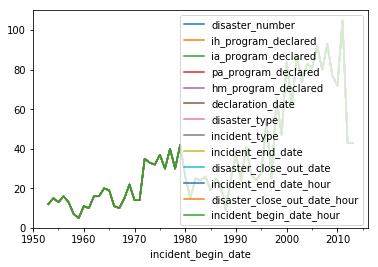

In [177]:
#dfByDesasterNumber.groupby(['disaster_number', 'incident_begin_date']).count().resample('M').count()
dfByDesasterNumber.groupby('incident_begin_date').count().resample('Y').count().plot()

Pending tasks:

- Parse booleans and dates
- See which kind of disasters and in which states the duration is the longest
- See relationship between disaster/state/date and period of time between incident_end and disaster_close_date
- See relationship between disaster/date/period and declaration of assistance programs